
<h1 style="background-color:SeaGreen;text-align: center"> Table of Contents</h1>
<p style="background-color:MediumSeaGreen;text-align: center">
1.Import Libraries<br>
2.Checking DataSet<br>
3.Exploratory Data Analysis & Data Visualisation<br>
4.Clustering<br>
5.Visualizing Clusters<br>
6.User recommentaions<br>

Created by: Deepika Kumar
</p>


<h1 style="background-color:yellow;text-align: center">1. Import Libraries</h1>

In [1]:
import matplotlib
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')
import geopy as gp
from geopy.geocoders import Nominatim
from geopy.point import Point


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.subplots as sp


<h1 style="background-color:yellow;text-align: center">2. Checking DataSet</h1>

In [2]:
df=pd.read_csv("makemytrip_com-travel_sample.csv",error_bad_lines=False)
df

b'Skipping line 2269: expected 33 fields, saw 52\n'


area  \
0                                      Hardasji Ki Magri   
1                                          Near Nai Gaon   
2                                  Near Bagore Ki Haveli   
3                                                  Dabok   
4                                           East Udaipur   
...                                                  ...   
20041                            Thonichal, Mananthavady   
20042                                                NaN   
20043                       Central Mysore,Nazarbad Road   
20044                                            Wayanad   
20045  Opp. APSEB Sub Station,Behind Bezwada Home Foo...   

                               city country  crawl_date  \
0                           Udaipur   India  2016-06-21   
1                           Udaipur   India  2016-06-21   
2                           Udaipur   India  2016-06-21   
3                           Udaipur   India  2016-06-21   
4                           Udaipur   India  2016-06-21   
...                             ...     ...         ...   
20041                       Wayanad   India         NaN   
20042                      Varanasi   India         NaN   
20043  WeekendGetawaysAroundChennai   India         NaN   
20044                       Wayanad   India         NaN   
20045                Vishakhapatnam   India         NaN   

                                         highlight_value  \
0                                           {{facility}}   
1                                           {{facility}}   
2                                           {{facility}}   
3      Airport Transfer|Car rental|Conference Hall|Cu...   
4                                           {{facility}}   
...                                                  ...   
20041  Conference Hall|Doctor on Call|Room Service|Tr...   
20042  24 Hour Doctor On Call.|Laundry Service (At a ...   
20043  Airport/Rlwy Stn Transfer|Business Centre|Conf...   
20044                                                NaN   
20045  Conference Hall|Dining Hall|Internet Facility|...   

                                          hotel_overview hotel_star_rating  \
0      |Zion Home Stay is located in a city that sets...            1 star   
1      | Araliayas Resorts is a 3 star hotel located ...            3 star   
2      |A 2 star property is located at 24 km from Ma...            2 star   
3      |SNP House Airport Hotel And Restaurant is loa...            1 star   
4      | Hotel Pichola Haveli is situated in the beau...            2 star   
...                                                  ...               ...   
20041  |Abhirami Farm Resorts is a budget property, s...            1 star   
20042  |Located in the Holy City of Varanasi, Hotel G...            1 star   
20043  |Ginger Hotel is nestled in Mysore which is ca...            3 star   
20044  Homestay is situated at Korram, in Wayanad Dis...            1 star   
20045  |4.4 km from Ramkrishna Beach, 4.2 km from Al ...            1 star   

                                              image_urls  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3      //imghtlak.mmtcdn.com/images/hotels/2014071815...   
4                                                    NaN   
...                                                  ...   
20041  //imghtlak.mmtcdn.com/images/hotels/2014121816...   
20042  //imghtlak.mmtcdn.com/images/hotels/2014102213...   
20043  //imghtlak.mmtcdn.com/images/hotels/2007011716...   
20044  http://www.tripvillas.com/media/origin/1049657...   
20045  //imghtlak.mmtcdn.com/images/hotels/2011021211...   

                                            in_your_room is_value_plus  ...  \
0                                              {{value}}            no  ...   
1                                              {{value}}            no  ...   
2     

In [3]:
print("Shape of the dataframe",df.shape)
print("duplicated Value count",df.duplicated().sum())
analys = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isnull().sum(),
    
    'NullPercent':df.isna().sum() / len(df),
    'Type':df.dtypes.values
    
})
display(analys)

Shape of the dataframe (20046, 33)
duplicated Value count 2210


Unique   Null  NullPercent     Type
area                               6514   5324     0.265589   object
city                                756      0     0.000000   object
country                               1    458     0.022847   object
crawl_date                           25   9349     0.466377   object
highlight_value                    8127   2372     0.118328   object
hotel_overview                    11493   3354     0.167315   object
hotel_star_rating                    15      0     0.000000   object
image_urls                         6711  11446     0.570987   object
in_your_room                       5571   5350     0.266886   object
is_value_plus                         2      0     0.000000   object
latitude                           9959     21     0.001048  float64
longitude                          9932     21     0.001048  float64
mmt_holidayiq_review_count          267  10634     0.530480  float64
mmt_location_rating                  81   8503     0.424174   object
mmt_review_count                    291  10668     0.532176  float64
mmt_review_rating                  3429   8503     0.424174   object
mmt_review_score                     42  10274     0.512521  float64
mmt_traveller_type_review_count    2918   2037     0.101616   object
mmt_tripadvisor_count               648   8888     0.443380  float64
pageurl                           17836      0     0.000000   object
property_address                  15038      4     0.000200   object
property_id                       15168      0     0.000000   object
property_name                     12612      0     0.000000   object
property_type                        14    110     0.005487   object
qts                                  83  14475     0.722089   object
query_time_stamp                    190      0     0.000000   object
room_types                         4917   4881     0.243490   object
site_review_count                    46  19138     0.954704   object
site_review_rating                   35  19492     0.972364  float64
sitename                              1      0     0.000000   object
state                               270  15162     0.756360   object
traveller_rating                   4967  13266     0.661778   object
uniq_id                           17836      0     0.000000   object

lets drop some unwanted columns

In [4]:
df.drop(['in_your_room', 'is_value_plus',"pageurl","query_time_stamp","image_urls","qts","site_review_count"], axis=1, inplace=True)

In [5]:
df.columns

Index(['area', 'city', 'country', 'crawl_date', 'highlight_value',
       'hotel_overview', 'hotel_star_rating', 'latitude', 'longitude',
       'mmt_holidayiq_review_count', 'mmt_location_rating', 'mmt_review_count',
       'mmt_review_rating', 'mmt_review_score',
       'mmt_traveller_type_review_count', 'mmt_tripadvisor_count',
       'property_address', 'property_id', 'property_name', 'property_type',
       'room_types', 'site_review_rating', 'sitename', 'state',
       'traveller_rating', 'uniq_id'],
      dtype='object')

so what we need is address and ratings..let's drop some other columns

In [6]:
df.drop(['crawl_date', 'highlight_value',"hotel_overview","mmt_holidayiq_review_count",'sitename', 'state',"mmt_review_rating"], axis=1, inplace=True)

In [7]:
df["traveller_rating"].value_counts().sort_values()

Location:4.6/5 | Hospitality:4.6/5 | Facilities:4.6/5 | Cleanliness:4.6/5 | Value for Money:4.6/5 | Food:3.3/5      1
Location:4.5/5 | Hospitality:4.2/5 | Facilities:3.9/5 | Cleanliness:4.4/5 | Value for Money:4.2/5 | Food:4.3/5      1
Location:4.3/5 | Hospitality:3.5/5 | Facilities:3.3/5 | Cleanliness:2.9/5 | Value for Money:3.5/5 | Food:2.3/5      1
Location:4.4/5 | Hospitality:3.6/5 | Facilities:3.6/5 | Cleanliness:2.4/5 | Value for Money:3.6/5 | Food:1.8/5      1
Location:4.7/5 | Hospitality:4.5/5 | Facilities:4/5 | Cleanliness:3.6/5 | Value for Money:4.3/5 | Food:3.7/5        1
                                                                                                                 ... 
3.5                                                                                                                29
4.0                                                                                                                33
Location:5.0/5 | Hospitality:5.0/5 | Facilities:5.0/5 | 

In [8]:
df

area  \
0                                      Hardasji Ki Magri   
1                                          Near Nai Gaon   
2                                  Near Bagore Ki Haveli   
3                                                  Dabok   
4                                           East Udaipur   
...                                                  ...   
20041                            Thonichal, Mananthavady   
20042                                                NaN   
20043                       Central Mysore,Nazarbad Road   
20044                                            Wayanad   
20045  Opp. APSEB Sub Station,Behind Bezwada Home Foo...   

                               city country hotel_star_rating   latitude  \
0                           Udaipur   India            1 star  24.581788   
1                           Udaipur   India            3 star  24.544342   
2                           Udaipur   India            2 star  24.579942   
3                           Udaipur   India            1 star  24.622607   
4                           Udaipur   India            2 star  24.580100   
...                             ...     ...               ...        ...   
20041                       Wayanad   India            1 star  11.769778   
20042                      Varanasi   India            1 star  25.310400   
20043  WeekendGetawaysAroundChennai   India            3 star  12.307097   
20044                       Wayanad   India            1 star  11.607579   
20045                Vishakhapatnam   India            1 star  17.739367   

       longitude mmt_location_rating  mmt_review_count  mmt_review_score  \
0      73.667805                  ..               NaN               4.5   
1      73.644242                  ..               NaN               4.5   
2      73.681953                  ..               NaN               NaN   
3      73.855194                 NaN               NaN               NaN   
4      73.682200                  ..               NaN               3.7   
...          ...                 ...               ...               ...   
20041  76.001652                 NaN               NaN               NaN   
20042  83.010200                   4               1.0               2.9   
20043  76.667002                 4.4             359.0               4.0   
20044  76.082773                 NaN               NaN               NaN   
20045  83.307634                 4.2              26.0               4.3   

                         mmt_traveller_type_review_count  \
0      Families:{{ratingSummaryInfo.miscMap['family']...   
1      Families:{{ratingSummaryInfo.miscMap['family']...   
2      Families:{{ratingSummaryInfo.miscMap['family']...   
3            Families:|Couples:|Business:|Solo:|Friends:   
4      Families:{{ratingSummaryInfo.miscMap['family']...   
...                                                  ...   
20041        Families:|Couples:|Business:|Solo:|Friends:   
20042   Families:0|Couples:0|Business:0|Solo:0|Friends:0   
20043  Families:160|Couples:41|Business:2|Solo:5|Frie...   
20044        Families:|Couples:|Business:|Solo:|Friends:   
20045   Families:5|Couples:5|Business:1|Solo:3|Friends:1   

       mmt_tripadvisor_count  \
0                        6.0   
1                       34.0   
2                       16.0   
3                        3.0   
4                      139.0   
...                      ...   
20041                    3.0   
20042                   32.0   
20043                  553.0   
20044                    NaN   
20045                   25.0   

                                        property_address  \
0      Zion, F-17, Haridas Ji Ki Magri, Near Bal Vina...   
1                    Udaipur-Jhadol Road , Near Nai Gaon   
2      23/208 Gangaur Ghat Near Bagore Ki Haveli , Ne...   
3          Opp GITS, NH-76, Bamaniya Khet, Dabok , Dabok   
4      64 Ghangour Ghat, Opp Bagore Ki Haveli , East ...   
...                                    

### processing ratings

In [9]:
df.hotel_star_rating.value_counts()

1 star        8292
1             3102
3 star        2977
2 star        1928
3             1231
2              884
4 star         752
5 star         340
4              321
5              155
0               43
Three on 5       9
Four on 5        7
Five on 5        3
Four star        2
Name: hotel_star_rating, dtype: int64

In [10]:
df['hotel_star_rating']=df['hotel_star_rating'].replace('1 star',1).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('2 star',2).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('3 star',3).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('4 star',4).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('5 star',5).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('Four star',4).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('Three on 5',3).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('Four on 5',4).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].replace('Five on 5',5).astype(str)
df['hotel_star_rating']=df['hotel_star_rating'].fillna(0).astype(str)

In [11]:
df.hotel_star_rating.value_counts()

1    11394
3     4217
2     2812
4     1082
5      498
0       43
Name: hotel_star_rating, dtype: int64

In [12]:
df['site_review_rating']=df['site_review_rating'].fillna(0).astype(str)


In [13]:
df.site_review_rating.value_counts()

0.0    19513
4.2       40
4.3       36
4.1       34
3.8       34
4.0       31
4.6       31
4.4       30
3.7       29
3.4       28
3.5       25
4.5       24
3.6       21
3.9       19
4.8       17
5.0       17
3.2       16
3.0       14
3.3       14
2.8       11
4.7       11
2.3        7
4.9        6
2.9        6
3.1        5
1.8        5
2.6        4
1.9        4
2.0        3
2.4        3
2.1        2
2.7        2
2.5        2
1.0        1
2.2        1
Name: site_review_rating, dtype: int64

In [14]:
df["traveller_rating"]=df.traveller_rating.fillna(0)

Let's fill Nan values in country to India

In [15]:
df["country"]=df.property_type.fillna("India")

Let's fill Nan values in area to City that is located

In [16]:
df["area"]=df.area.fillna(df["city"])

Let's fill Nan values in property to Hotel

In [17]:
df["property_type"]=df.property_type.fillna("Hotel")

In [18]:
df["room_types"]=df.property_type.fillna("Standard Room")

In [19]:
df.replace('..', np.NaN, inplace=True)
df.replace('', np.NaN, inplace=True)

In [20]:
df

area  \
0                                      Hardasji Ki Magri   
1                                          Near Nai Gaon   
2                                  Near Bagore Ki Haveli   
3                                                  Dabok   
4                                           East Udaipur   
...                                                  ...   
20041                            Thonichal, Mananthavady   
20042                                           Varanasi   
20043                       Central Mysore,Nazarbad Road   
20044                                            Wayanad   
20045  Opp. APSEB Sub Station,Behind Bezwada Home Foo...   

                               city country hotel_star_rating   latitude  \
0                           Udaipur   Hotel                 1  24.581788   
1                           Udaipur   Hotel                 3  24.544342   
2                           Udaipur   Hotel                 2  24.579942   
3                           Udaipur   Hotel                 1  24.622607   
4                           Udaipur   Hotel                 2  24.580100   
...                             ...     ...               ...        ...   
20041                       Wayanad   Hotel                 1  11.769778   
20042                      Varanasi   Lodge                 1  25.310400   
20043  WeekendGetawaysAroundChennai   Hotel                 3  12.307097   
20044                       Wayanad   Hotel                 1  11.607579   
20045                Vishakhapatnam   Hotel                 1  17.739367   

       longitude mmt_location_rating  mmt_review_count  mmt_review_score  \
0      73.667805                 NaN               NaN               4.5   
1      73.644242                 NaN               NaN               4.5   
2      73.681953                 NaN               NaN               NaN   
3      73.855194                 NaN               NaN               NaN   
4      73.682200                 NaN               NaN               3.7   
...          ...                 ...               ...               ...   
20041  76.001652                 NaN               NaN               NaN   
20042  83.010200                   4               1.0               2.9   
20043  76.667002                 4.4             359.0               4.0   
20044  76.082773                 NaN               NaN               NaN   
20045  83.307634                 4.2              26.0               4.3   

                         mmt_traveller_type_review_count  \
0      Families:{{ratingSummaryInfo.miscMap['family']...   
1      Families:{{ratingSummaryInfo.miscMap['family']...   
2      Families:{{ratingSummaryInfo.miscMap['family']...   
3            Families:|Couples:|Business:|Solo:|Friends:   
4      Families:{{ratingSummaryInfo.miscMap['family']...   
...                                                  ...   
20041        Families:|Couples:|Business:|Solo:|Friends:   
20042   Families:0|Couples:0|Business:0|Solo:0|Friends:0   
20043  Families:160|Couples:41|Business:2|Solo:5|Frie...   
20044        Families:|Couples:|Business:|Solo:|Friends:   
20045   Families:5|Couples:5|Business:1|Solo:3|Friends:1   

       mmt_tripadvisor_count  \
0                        6.0   
1                       34.0   
2                       16.0   
3                        3.0   
4                      139.0   
...                      ...   
20041                    3.0   
20042                   32.0   
20043                  553.0   
20044                    NaN   
20045                   25.0   

                                        property_address  \
0      Zion, F-17, Haridas Ji Ki Magri, Near Bal Vina...   
1                    Udaipur-Jhadol Road , Near Nai Gaon   
2      23/208 Gangaur Ghat Near Bagore Ki Haveli , Ne...   
3          Opp GITS, NH-76, Bamaniya Khet, Dabok , Dabok   
4      64 Ghangour Ghat, Opp Bagore Ki Haveli , East ...   
...                                    

In [21]:
print("Shape of the dataframe",df.shape)
print("duplicated Value count",df.duplicated().sum())
null = pd.DataFrame({
    
    'Null':df.isnull().sum(),
    
    'NullPercent':df.isna().sum() / len(df),
    
    
})
display(null)

Shape of the dataframe (20046, 19)
duplicated Value count 2210


Null  NullPercent
area                                 0     0.000000
city                                 0     0.000000
country                              0     0.000000
hotel_star_rating                    0     0.000000
latitude                            21     0.001048
longitude                           21     0.001048
mmt_location_rating              13339     0.665420
mmt_review_count                 10668     0.532176
mmt_review_score                 10274     0.512521
mmt_traveller_type_review_count   2037     0.101616
mmt_tripadvisor_count             8888     0.443380
property_address                     4     0.000200
property_id                          0     0.000000
property_name                        0     0.000000
property_type                        0     0.000000
room_types                           0     0.000000
site_review_rating                   0     0.000000
traveller_rating                     0     0.000000
uniq_id                              0     0.000000

In [22]:
df.loc[df["property_address"].isnull()]

area        city country hotel_star_rating  \
686                           Nellore     Nellore   Hotel                 3   
2896                          Nellore     Nellore   Hotel                 3   
15035                         Aligarh     Aligarh   Hotel                 3   
19664  Laden La Road, Close to Market  Darjeeling   Hotel                 3   

       latitude  longitude mmt_location_rating  mmt_review_count  \
686         NaN        NaN                 NaN               NaN   
2896        NaN        NaN                 NaN               NaN   
15035       NaN        NaN                 NaN               NaN   
19664       NaN        NaN                 NaN               NaN   

       mmt_review_score mmt_traveller_type_review_count  \
686                 NaN                             NaN   
2896                NaN                             NaN   
15035               NaN                             NaN   
19664               NaN                             NaN   

       mmt_tripadvisor_count property_address            property_id  \
686                      NaN              NaN  201512212000556702&i=   
2896                     NaN              NaN  201512212000556702&i=   
15035                    NaN              NaN     201411071705489288   
19664                   15.0              NaN  201412031915594823&i=   

                        property_name property_type room_types  \
686                 D R Utthama Hotel         Hotel      Hotel   
2896                D R Utthama Hotel         Hotel      Hotel   
15035                 Padam Residency         Hotel      Hotel   
19664  Central Heritage Resort and...         Hotel      Hotel   

      site_review_rating traveller_rating                           uniq_id  
686                  0.0                0  48c35cd7ad50f17cb0dac7bf76653346  
2896                 0.0                0  48c35cd7ad50f17cb0dac7bf76653346  
15035                0.0                0  0a6dd8c9d26e4fcddbb00fc5de8982c8  
19664                0.0                0  1c570546d8fe17261bca34b3d91d36c9

we can't get location details with these columns. so let's drop.

In [23]:
df = df.loc[~df['property_address'].isnull()]
i=np.arange(1,(len(df["uniq_id"]))+1)
df.set_index(i,inplace=True)
df

area  \
1                                      Hardasji Ki Magri   
2                                          Near Nai Gaon   
3                                  Near Bagore Ki Haveli   
4                                                  Dabok   
5                                           East Udaipur   
...                                                  ...   
20038                            Thonichal, Mananthavady   
20039                                           Varanasi   
20040                       Central Mysore,Nazarbad Road   
20041                                            Wayanad   
20042  Opp. APSEB Sub Station,Behind Bezwada Home Foo...   

                               city country hotel_star_rating   latitude  \
1                           Udaipur   Hotel                 1  24.581788   
2                           Udaipur   Hotel                 3  24.544342   
3                           Udaipur   Hotel                 2  24.579942   
4                           Udaipur   Hotel                 1  24.622607   
5                           Udaipur   Hotel                 2  24.580100   
...                             ...     ...               ...        ...   
20038                       Wayanad   Hotel                 1  11.769778   
20039                      Varanasi   Lodge                 1  25.310400   
20040  WeekendGetawaysAroundChennai   Hotel                 3  12.307097   
20041                       Wayanad   Hotel                 1  11.607579   
20042                Vishakhapatnam   Hotel                 1  17.739367   

       longitude mmt_location_rating  mmt_review_count  mmt_review_score  \
1      73.667805                 NaN               NaN               4.5   
2      73.644242                 NaN               NaN               4.5   
3      73.681953                 NaN               NaN               NaN   
4      73.855194                 NaN               NaN               NaN   
5      73.682200                 NaN               NaN               3.7   
...          ...                 ...               ...               ...   
20038  76.001652                 NaN               NaN               NaN   
20039  83.010200                   4               1.0               2.9   
20040  76.667002                 4.4             359.0               4.0   
20041  76.082773                 NaN               NaN               NaN   
20042  83.307634                 4.2              26.0               4.3   

                         mmt_traveller_type_review_count  \
1      Families:{{ratingSummaryInfo.miscMap['family']...   
2      Families:{{ratingSummaryInfo.miscMap['family']...   
3      Families:{{ratingSummaryInfo.miscMap['family']...   
4            Families:|Couples:|Business:|Solo:|Friends:   
5      Families:{{ratingSummaryInfo.miscMap['family']...   
...                                                  ...   
20038        Families:|Couples:|Business:|Solo:|Friends:   
20039   Families:0|Couples:0|Business:0|Solo:0|Friends:0   
20040  Families:160|Couples:41|Business:2|Solo:5|Frie...   
20041        Families:|Couples:|Business:|Solo:|Friends:   
20042   Families:5|Couples:5|Business:1|Solo:3|Friends:1   

       mmt_tripadvisor_count  \
1                        6.0   
2                       34.0   
3                       16.0   
4                        3.0   
5                      139.0   
...                      ...   
20038                    3.0   
20039                   32.0   
20040                  553.0   
20041                    NaN   
20042                   25.0   

                                        property_address  \
1      Zion, F-17, Haridas Ji Ki Magri, Near Bal Vina...   
2                    Udaipur-Jhadol Road , Near Nai Gaon   
3      23/208 Gangaur Ghat Near Bagore Ki Haveli , Ne...   
4          Opp GITS, NH-76, Bamaniya Khet, Dabok , Dabok   
5      64 Ghangour Ghat, Opp Bagore Ki Haveli , East ...   
...                                    

In [24]:
df["property_type"]=df.property_type.fillna("Hotel")

### traveller_rating Formatting

In [25]:
df["traveller_rating"]=df["traveller_rating"].astype(str)

In [26]:
df["traveller_rating"].isnull().sum()

0

In [27]:
df1 = df[~df["traveller_rating"].str.contains('Location')]
df1

area            city country hotel_star_rating  \
1            Hardasji Ki Magri         Udaipur   Hotel                 1   
2                Near Nai Gaon         Udaipur   Hotel                 3   
3        Near Bagore Ki Haveli         Udaipur   Hotel                 2   
4                        Dabok         Udaipur   Hotel                 1   
5                 East Udaipur         Udaipur   Hotel                 2   
...                        ...             ...     ...               ...   
20033           Vishakhapatnam  Vishakhapatnam   Hotel                 1   
20035                 varanasi        Varanasi   Lodge                 1   
20036             Bedford Road         Yercaud   Hotel                 1   
20038  Thonichal, Mananthavady         Wayanad   Hotel                 1   
20041                  Wayanad         Wayanad   Hotel                 1   

        latitude  longitude mmt_location_rating  mmt_review_count  \
1      24.581788  73.667805                 NaN               NaN   
2      24.544342  73.644242                 NaN               NaN   
3      24.579942  73.681953                 NaN               NaN   
4      24.622607  73.855194                 NaN               NaN   
5      24.580100  73.682200                 NaN               NaN   
...          ...        ...                 ...               ...   
20033  17.732237  83.318084                 NaN               NaN   
20035   0.000000   0.000000                 NaN               NaN   
20036  11.781300  78.217700                 NaN               NaN   
20038  11.769778  76.001652                 NaN               NaN   
20041  11.607579  76.082773                 NaN               NaN   

       mmt_review_score                    mmt_traveller_type_review_count  \
1                   4.5  Families:{{ratingSummaryInfo.miscMap['family']...   
2                   4.5  Families:{{ratingSummaryInfo.miscMap['family']...   
3                   NaN  Families:{{ratingSummaryInfo.miscMap['family']...   
4                   NaN        Families:|Couples:|Business:|Solo:|Friends:   
5                   3.7  Families:{{ratingSummaryInfo.miscMap['family']...   
...                 ...                                                ...   
20033               4.5        Families:|Couples:|Business:|Solo:|Friends:   
20035               NaN        Families:|Couples:|Business:|Solo:|Friends:   
20036               NaN        Families:|Couples:|Business:|Solo:|Friends:   
20038               NaN        Families:|Couples:|Business:|Solo:|Friends:   
20041               NaN        Families:|Couples:|Business:|Solo:|Friends:   

       mmt_tripadvisor_count  \
1                        6.0   
2                       34.0   
3                       16.0   
4                        3.0   
5                      139.0   
...                      ...   
20033                    1.0   
20035                    NaN   
20036                    6.0   
20038                    3.0   
20041                    NaN   

                                        property_address  \
1      Zion, F-17, Haridas Ji Ki Magri, Near Bal Vina...   
2                    Udaipur-Jhadol Road , Near Nai Gaon   
3      23/208 Gangaur Ghat Near Bagore Ki Haveli , Ne...   
4          Opp GITS, NH-76, Bamaniya Khet, Dabok , Dabok   
5      64 Ghangour Ghat, Opp Bagore Ki Haveli , East ...   
...                                                  ...   
20033  9-1-44, New Resapuvanipalem Near CMR Central V...   
20035             Vijya nagaram Market, cantt , varanasi   
20036  Plot No20, Bedford Avenue, Bedford Road,Yercau...   
20038  Thonichal, Mananthavady , Thonichal, Mananthavady   
20041                          Near Town Koram , Wayanad   

                 property_id                           property_name  \
1         201302071713316867                          Zion Home Stay   
2         201312041703404727                       Araliayas Resorts   
3         201407171324437

In [28]:
df1["Location"]=df1["traveller_rating"]
df1["Hospitality"]=df1["traveller_rating"]
df1["Facilities"]=df1["traveller_rating"]
df1["Cleanliness"]=df1["traveller_rating"]
df1["Value for Money"]=df1["traveller_rating"]
df1["Food"]=df1["traveller_rating"]

In [29]:
df1

area            city country hotel_star_rating  \
1            Hardasji Ki Magri         Udaipur   Hotel                 1   
2                Near Nai Gaon         Udaipur   Hotel                 3   
3        Near Bagore Ki Haveli         Udaipur   Hotel                 2   
4                        Dabok         Udaipur   Hotel                 1   
5                 East Udaipur         Udaipur   Hotel                 2   
...                        ...             ...     ...               ...   
20033           Vishakhapatnam  Vishakhapatnam   Hotel                 1   
20035                 varanasi        Varanasi   Lodge                 1   
20036             Bedford Road         Yercaud   Hotel                 1   
20038  Thonichal, Mananthavady         Wayanad   Hotel                 1   
20041                  Wayanad         Wayanad   Hotel                 1   

        latitude  longitude mmt_location_rating  mmt_review_count  \
1      24.581788  73.667805                 NaN               NaN   
2      24.544342  73.644242                 NaN               NaN   
3      24.579942  73.681953                 NaN               NaN   
4      24.622607  73.855194                 NaN               NaN   
5      24.580100  73.682200                 NaN               NaN   
...          ...        ...                 ...               ...   
20033  17.732237  83.318084                 NaN               NaN   
20035   0.000000   0.000000                 NaN               NaN   
20036  11.781300  78.217700                 NaN               NaN   
20038  11.769778  76.001652                 NaN               NaN   
20041  11.607579  76.082773                 NaN               NaN   

       mmt_review_score                    mmt_traveller_type_review_count  \
1                   4.5  Families:{{ratingSummaryInfo.miscMap['family']...   
2                   4.5  Families:{{ratingSummaryInfo.miscMap['family']...   
3                   NaN  Families:{{ratingSummaryInfo.miscMap['family']...   
4                   NaN        Families:|Couples:|Business:|Solo:|Friends:   
5                   3.7  Families:{{ratingSummaryInfo.miscMap['family']...   
...                 ...                                                ...   
20033               4.5        Families:|Couples:|Business:|Solo:|Friends:   
20035               NaN        Families:|Couples:|Business:|Solo:|Friends:   
20036               NaN        Families:|Couples:|Business:|Solo:|Friends:   
20038               NaN        Families:|Couples:|Business:|Solo:|Friends:   
20041               NaN        Families:|Couples:|Business:|Solo:|Friends:   

       ...  room_types site_review_rating traveller_rating  \
1      ...       Hotel                4.5                0   
2      ...       Hotel                4.5                0   
3      ...       Hotel                0.0                0   
4      ...       Hotel                0.0                0   
5      ...       Hotel                3.7                0   
...    ...         ...                ...              ...   
20033  ...       Hotel                0.0                0   
20035  ...       Lodge                0.0                0   
20036  ...       Hotel                0.0                0   
20038  ...       Hotel                0.0                0   
20041  ...       Hotel                0.0                0   

                                uniq_id Location Hospitality Facilities  \
1      78ddf880bd7937d384ff278cc5b39d6e        0           0          0   
2      9f9f9cbb2f7df8089b63d5cdeb257944        0           0          0   
3      b314bb7fa8bfb1ed306f517be21d729e        0           0          0   
4      e6f5bb3c2d76a78d978b9ceb0e31ec56        0           0          0   
5      63072c301427b6ca450d31eea127bcf0        0           0          0   
...                                 ...      ...         ...        ...   
20033  b4ef9241b8798b354a1c85ef39eaf071        0           0          0   
20

In [30]:
df1["Location"].value_counts()

0      13262
0.0       67
4.0       33
3.5       29
4.5       14
3.0       10
2.5        7
5.0        3
1.5        1
2.0        1
Name: Location, dtype: int64

In [31]:
df2 = df[df["traveller_rating"].str.contains('Location')]
df2

area  \
30                                             Hyderabad   
32                                             Mussoorie   
36                         Jammu-Pathankot Highway NH-1A   
38                                              Robinson   
39                                        Central avenue   
...                                                  ...   
20034                                    Muttil, Wayanad   
20037                                        Manmad Road   
20039                                           Varanasi   
20040                       Central Mysore,Nazarbad Road   
20042  Opp. APSEB Sub Station,Behind Bezwada Home Foo...   

                               city country hotel_star_rating   latitude  \
30                        Hyderabad   Hotel                 1  17.438037   
32                        Mussoorie   Hotel                 2  30.454533   
36                            Jammu   Hotel                 4  32.596574   
38                         Palakkad   Hotel                 3  10.769421   
39                           Nagpur   Hotel                 1  21.151397   
...                             ...     ...               ...        ...   
20034                       Wayanad   Hotel                 1  11.662949   
20037     WeekendGetawaysAroundPune   Hotel                 3  19.748200   
20039                      Varanasi   Lodge                 1  25.310400   
20040  WeekendGetawaysAroundChennai   Hotel                 3  12.307097   
20042                Vishakhapatnam   Hotel                 1  17.739367   

       longitude mmt_location_rating  mmt_review_count  mmt_review_score  \
30     78.389837        Location:5.0               1.0               5.0   
32     78.081074        Location:2.5               2.0               5.0   
36     74.959716        Location:4.2              18.0               4.3   
38     76.656247        Location:4.6              36.0               4.4   
39     79.098131        Location:3.8              32.0               3.1   
...          ...                 ...               ...               ...   
20034  76.110786                   5               2.0               4.9   
20037  74.478100                 4.6               5.0               4.7   
20039  83.010200                   4               1.0               2.9   
20040  76.667002                 4.4             359.0               4.0   
20042  83.307634                 4.2              26.0               4.3   

                         mmt_traveller_type_review_count  \
30         Family:0|Couple:0|Solo:0|Friends:0|Business:1   
32         Family:0|Couple:0|Solo:1|Friends:0|Business:0   
36         Family:6|Couple:5|Solo:5|Friends:0|Business:0   
38       Family:11|Couple:4|Solo:16|Friends:0|Business:1   
39        Family:4|Couple:1|Solo:17|Friends:0|Business:2   
...                                                  ...   
20034   Families:2|Couples:0|Business:0|Solo:0|Friends:0   
20037   Families:1|Couples:2|Business:0|Solo:0|Friends:0   
20039   Families:0|Couples:0|Business:0|Solo:0|Friends:0   
20040  Families:160|Couples:41|Business:2|Solo:5|Frie...   
20042   Families:5|Couples:5|Business:1|Solo:3|Friends:1   

       mmt_tripadvisor_count  \
30                       4.0   
32                       NaN   
36                      45.0   
38                      38.0   
39                      26.0   
...                      ...   
20034                   38.0   
20037                   22.0   
20039                   32.0   
20040                  553.0   
20042                   25.0   

                                        property_address  \
30     Plot No 2, Brindavan Colony Near Nector Garden...   
32     Kulri, The Mall Rd, Mussoorie, Uttarakhand 248179   
36                                       NH A1, Vijaypur   
38                      Robinson Road, Palakkad Palakkad   
39              51, Central Avenue Opp. Gitanjali Cinema   
...                                    

In [32]:
df2[["Location","Hospitality","Facilities", "Cleanliness","Value for Money","Food"]]= df2["traveller_rating"].str.split("|",6, expand=True) 
df2

area  \
30                                             Hyderabad   
32                                             Mussoorie   
36                         Jammu-Pathankot Highway NH-1A   
38                                              Robinson   
39                                        Central avenue   
...                                                  ...   
20034                                    Muttil, Wayanad   
20037                                        Manmad Road   
20039                                           Varanasi   
20040                       Central Mysore,Nazarbad Road   
20042  Opp. APSEB Sub Station,Behind Bezwada Home Foo...   

                               city country hotel_star_rating   latitude  \
30                        Hyderabad   Hotel                 1  17.438037   
32                        Mussoorie   Hotel                 2  30.454533   
36                            Jammu   Hotel                 4  32.596574   
38                         Palakkad   Hotel                 3  10.769421   
39                           Nagpur   Hotel                 1  21.151397   
...                             ...     ...               ...        ...   
20034                       Wayanad   Hotel                 1  11.662949   
20037     WeekendGetawaysAroundPune   Hotel                 3  19.748200   
20039                      Varanasi   Lodge                 1  25.310400   
20040  WeekendGetawaysAroundChennai   Hotel                 3  12.307097   
20042                Vishakhapatnam   Hotel                 1  17.739367   

       longitude mmt_location_rating  mmt_review_count  mmt_review_score  \
30     78.389837        Location:5.0               1.0               5.0   
32     78.081074        Location:2.5               2.0               5.0   
36     74.959716        Location:4.2              18.0               4.3   
38     76.656247        Location:4.6              36.0               4.4   
39     79.098131        Location:3.8              32.0               3.1   
...          ...                 ...               ...               ...   
20034  76.110786                   5               2.0               4.9   
20037  74.478100                 4.6               5.0               4.7   
20039  83.010200                   4               1.0               2.9   
20040  76.667002                 4.4             359.0               4.0   
20042  83.307634                 4.2              26.0               4.3   

                         mmt_traveller_type_review_count  ...  room_types  \
30         Family:0|Couple:0|Solo:0|Friends:0|Business:1  ...       Hotel   
32         Family:0|Couple:0|Solo:1|Friends:0|Business:0  ...       Hotel   
36         Family:6|Couple:5|Solo:5|Friends:0|Business:0  ...       Hotel   
38       Family:11|Couple:4|Solo:16|Friends:0|Business:1  ...       Hotel   
39        Family:4|Couple:1|Solo:17|Friends:0|Business:2  ...       Hotel   
...                                                  ...  ...         ...   
20034   Families:2|Couples:0|Business:0|Solo:0|Friends:0  ...       Hotel   
20037   Families:1|Couples:2|Business:0|Solo:0|Friends:0  ...       Hotel   
20039   Families:0|Couples:0|Business:0|Solo:0|Friends:0  ...       Lodge   
20040  Families:160|Couples:41|Business:2|Solo:5|Frie...  ...       Hotel   
20042   Families:5|Couples:5|Business:1|Solo:3|Friends:1  ...       Hotel   

      site_review_rating                                   traveller_rating  \
30                   0.0  Location:5.0/5 | Hospitality:5.0/5 | Facilitie...   
32                   0.0  Location:2.5/5 | Hospitality:2.5/5 | Facilitie...   
36                   0.0  Location:4.2/5 | Hospitality:4.3/5 | Facilitie...   
38                   0.0  Location:4.6/5 | Hospitality:4.3/5 | Facilitie...   
39                   0.0  Location:3.8/5 | Hospitality:2.7/5 | Facilitie...   
...                  ...                                                ...   
20034                0.0  L

In [33]:
c=["Location","Hospitality","Facilities", "Cleanliness","Value for Money","Food"]
for i, cn in enumerate(df2[c]):
    df2[cn].replace((cn)+":",'',regex=True,inplace=True)
    df2[cn].replace("/5",'',regex=True,inplace=True)

In [34]:
df2

area  \
30                                             Hyderabad   
32                                             Mussoorie   
36                         Jammu-Pathankot Highway NH-1A   
38                                              Robinson   
39                                        Central avenue   
...                                                  ...   
20034                                    Muttil, Wayanad   
20037                                        Manmad Road   
20039                                           Varanasi   
20040                       Central Mysore,Nazarbad Road   
20042  Opp. APSEB Sub Station,Behind Bezwada Home Foo...   

                               city country hotel_star_rating   latitude  \
30                        Hyderabad   Hotel                 1  17.438037   
32                        Mussoorie   Hotel                 2  30.454533   
36                            Jammu   Hotel                 4  32.596574   
38                         Palakkad   Hotel                 3  10.769421   
39                           Nagpur   Hotel                 1  21.151397   
...                             ...     ...               ...        ...   
20034                       Wayanad   Hotel                 1  11.662949   
20037     WeekendGetawaysAroundPune   Hotel                 3  19.748200   
20039                      Varanasi   Lodge                 1  25.310400   
20040  WeekendGetawaysAroundChennai   Hotel                 3  12.307097   
20042                Vishakhapatnam   Hotel                 1  17.739367   

       longitude mmt_location_rating  mmt_review_count  mmt_review_score  \
30     78.389837        Location:5.0               1.0               5.0   
32     78.081074        Location:2.5               2.0               5.0   
36     74.959716        Location:4.2              18.0               4.3   
38     76.656247        Location:4.6              36.0               4.4   
39     79.098131        Location:3.8              32.0               3.1   
...          ...                 ...               ...               ...   
20034  76.110786                   5               2.0               4.9   
20037  74.478100                 4.6               5.0               4.7   
20039  83.010200                   4               1.0               2.9   
20040  76.667002                 4.4             359.0               4.0   
20042  83.307634                 4.2              26.0               4.3   

                         mmt_traveller_type_review_count  ...  room_types  \
30         Family:0|Couple:0|Solo:0|Friends:0|Business:1  ...       Hotel   
32         Family:0|Couple:0|Solo:1|Friends:0|Business:0  ...       Hotel   
36         Family:6|Couple:5|Solo:5|Friends:0|Business:0  ...       Hotel   
38       Family:11|Couple:4|Solo:16|Friends:0|Business:1  ...       Hotel   
39        Family:4|Couple:1|Solo:17|Friends:0|Business:2  ...       Hotel   
...                                                  ...  ...         ...   
20034   Families:2|Couples:0|Business:0|Solo:0|Friends:0  ...       Hotel   
20037   Families:1|Couples:2|Business:0|Solo:0|Friends:0  ...       Hotel   
20039   Families:0|Couples:0|Business:0|Solo:0|Friends:0  ...       Lodge   
20040  Families:160|Couples:41|Business:2|Solo:5|Frie...  ...       Hotel   
20042   Families:5|Couples:5|Business:1|Solo:3|Friends:1  ...       Hotel   

      site_review_rating                                   traveller_rating  \
30                   0.0  Location:5.0/5 | Hospitality:5.0/5 | Facilitie...   
32                   0.0  Location:2.5/5 | Hospitality:2.5/5 | Facilitie...   
36                   0.0  Location:4.2/5 | Hospitality:4.3/5 | Facilitie...   
38                   0.0  Location:4.6/5 | Hospitality:4.3/5 | Facilitie...   
39                   0.0  Location:3.8/5 | Hospitality:2.7/5 | Facilitie...   
...                  ...                                                ...   
20034                0.0  L

In [35]:
df2["Location"].value_counts()

4.5     597
5       519
4       435
4.6     427
4.2     425
4.4     405
5.0     392
4.3     390
4.7     381
4.8     360
4.1     270
4.0     242
3.9     188
3.8     188
3.5     166
3.7     164
3       146
4.9     144
3.6     114
3.4      83
3.3      77
2.0      66
3.2      65
2        62
3.0      53
3.1      33
2.5      29
1        29
2.7      27
2.6      18
2.9      18
2.8      17
2.2      13
2.4      10
0.0       9
1.0       9
2.3       9
1.5       9
1.8       7
2.1       4
1.9       3
1.3       2
0.6       2
1.4       2
0.3       1
1.2       1
1.7       1
1.1       1
0.4       1
0.7       1
Name: Location, dtype: int64

In [36]:
data = pd.concat([df1, df2]).sort_index()
data

area  \
1                                      Hardasji Ki Magri   
2                                          Near Nai Gaon   
3                                  Near Bagore Ki Haveli   
4                                                  Dabok   
5                                           East Udaipur   
...                                                  ...   
20038                            Thonichal, Mananthavady   
20039                                           Varanasi   
20040                       Central Mysore,Nazarbad Road   
20041                                            Wayanad   
20042  Opp. APSEB Sub Station,Behind Bezwada Home Foo...   

                               city country hotel_star_rating   latitude  \
1                           Udaipur   Hotel                 1  24.581788   
2                           Udaipur   Hotel                 3  24.544342   
3                           Udaipur   Hotel                 2  24.579942   
4                           Udaipur   Hotel                 1  24.622607   
5                           Udaipur   Hotel                 2  24.580100   
...                             ...     ...               ...        ...   
20038                       Wayanad   Hotel                 1  11.769778   
20039                      Varanasi   Lodge                 1  25.310400   
20040  WeekendGetawaysAroundChennai   Hotel                 3  12.307097   
20041                       Wayanad   Hotel                 1  11.607579   
20042                Vishakhapatnam   Hotel                 1  17.739367   

       longitude mmt_location_rating  mmt_review_count  mmt_review_score  \
1      73.667805                 NaN               NaN               4.5   
2      73.644242                 NaN               NaN               4.5   
3      73.681953                 NaN               NaN               NaN   
4      73.855194                 NaN               NaN               NaN   
5      73.682200                 NaN               NaN               3.7   
...          ...                 ...               ...               ...   
20038  76.001652                 NaN               NaN               NaN   
20039  83.010200                   4               1.0               2.9   
20040  76.667002                 4.4             359.0               4.0   
20041  76.082773                 NaN               NaN               NaN   
20042  83.307634                 4.2              26.0               4.3   

                         mmt_traveller_type_review_count  ...  room_types  \
1      Families:{{ratingSummaryInfo.miscMap['family']...  ...       Hotel   
2      Families:{{ratingSummaryInfo.miscMap['family']...  ...       Hotel   
3      Families:{{ratingSummaryInfo.miscMap['family']...  ...       Hotel   
4            Families:|Couples:|Business:|Solo:|Friends:  ...       Hotel   
5      Families:{{ratingSummaryInfo.miscMap['family']...  ...       Hotel   
...                                                  ...  ...         ...   
20038        Families:|Couples:|Business:|Solo:|Friends:  ...       Hotel   
20039   Families:0|Couples:0|Business:0|Solo:0|Friends:0  ...       Lodge   
20040  Families:160|Couples:41|Business:2|Solo:5|Frie...  ...       Hotel   
20041        Families:|Couples:|Business:|Solo:|Friends:  ...       Hotel   
20042   Families:5|Couples:5|Business:1|Solo:3|Friends:1  ...       Hotel   

      site_review_rating                                   traveller_rating  \
1                    4.5                                                  0   
2                    4.5                                                  0   
3                    0.0                                                  0   
4                    0.0                                                  0   
5                    3.7                                                  0   
...                  ...                                                ...   
20038                0.0   

In [37]:
data.Location.value_counts()

0       13262
4.5       597
5         519
4         435
4.6       427
4.2       425
4.4       405
5.0       392
4.3       390
4.7       381
4.8       360
4.1       270
4.0       242
3.9       188
3.8       188
3.5       166
3.7       164
3         146
4.9       144
3.6       114
3.4        83
3.3        77
0.0        67
2.0        66
3.2        65
2          62
3.0        53
4.0        33
3.1        33
3.5        29
1          29
2.5        29
2.7        27
2.6        18
2.9        18
2.8        17
4.5        14
2.2        13
3.0        10
2.4        10
0.0         9
1.5         9
2.3         9
1.0         9
1.8         7
2.5         7
2.1         4
5.0         3
1.9         3
1.4         2
1.3         2
0.6         2
0.3         1
1.7         1
1.2         1
1.1         1
0.4         1
0.7         1
1.5         1
2.0         1
Name: Location, dtype: int64

Now we have traveller rating seperated

In [38]:
print("Shape of the dataframe",data.shape)
print("duplicated Value count",data.duplicated().sum())
null = pd.DataFrame({
    
    'Null':data.isnull().sum(),
    
    'NullPercent':data.isna().sum() / len(data),
    
    
})
display(null)

Shape of the dataframe (20042, 25)
duplicated Value count 2209


Null  NullPercent
area                                 0     0.000000
city                                 0     0.000000
country                              0     0.000000
hotel_star_rating                    0     0.000000
latitude                            17     0.000848
longitude                           17     0.000848
mmt_location_rating              13335     0.665353
mmt_review_count                 10664     0.532083
mmt_review_score                 10270     0.512424
mmt_traveller_type_review_count   2033     0.101437
mmt_tripadvisor_count             8885     0.443319
property_address                     0     0.000000
property_id                          0     0.000000
property_name                        0     0.000000
property_type                        0     0.000000
room_types                           0     0.000000
site_review_rating                   0     0.000000
traveller_rating                     0     0.000000
uniq_id                              0     0.000000
Location                             0     0.000000
Hospitality                          0     0.000000
Facilities                           0     0.000000
Cleanliness                          0     0.000000
Value for Money                      0     0.000000
Food                                 0     0.000000

now we have Null values only in MMt columns

In [39]:
data[["mmt_location_rating","mmt_review_count","mmt_review_score", "mmt_traveller_type_review_count",  "mmt_tripadvisor_count"]]=data[["mmt_location_rating","mmt_review_count","mmt_review_score", "mmt_traveller_type_review_count","mmt_tripadvisor_count"]].fillna(0)


<h1 style="background-color:yellow;text-align: center">3.Exploratory Data Analysis & Data Visualisation</h1>

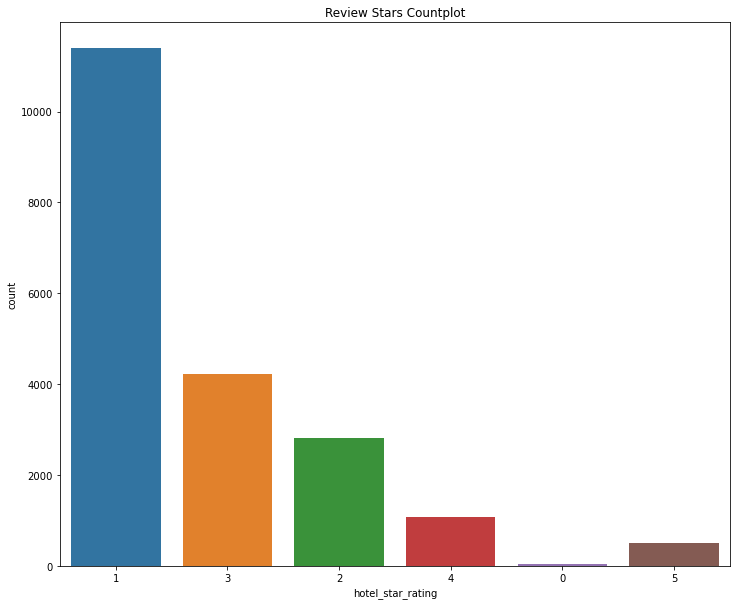

In [40]:

fig, ax = plt.subplots(figsize=(12,10))
sns.countplot(data['hotel_star_rating'], ax=ax)
plt.title('Review Stars Countplot')
plt.savefig('stars.png')
plt.show()

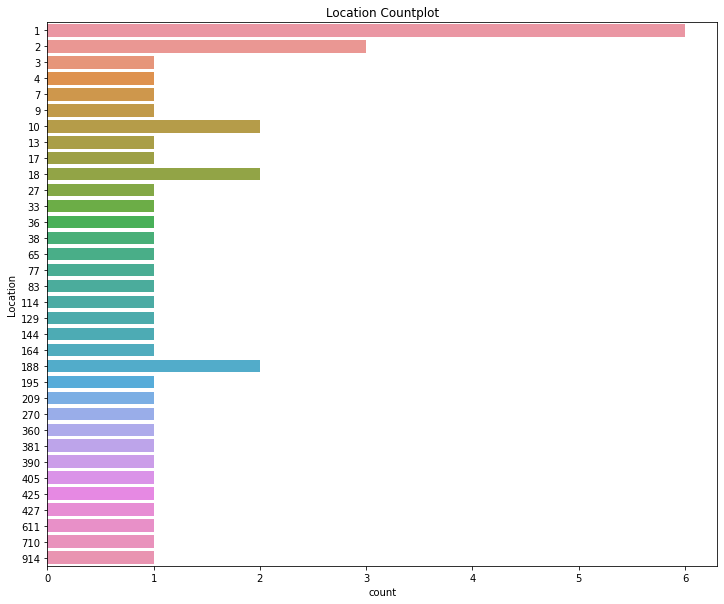

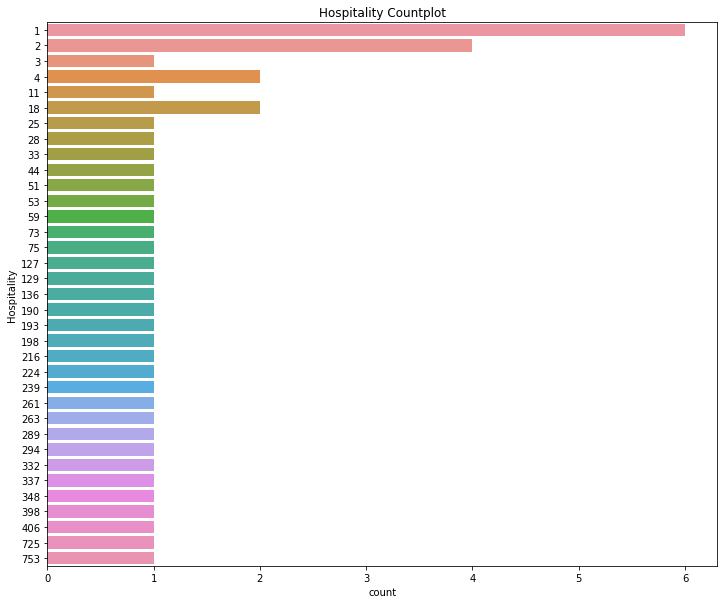

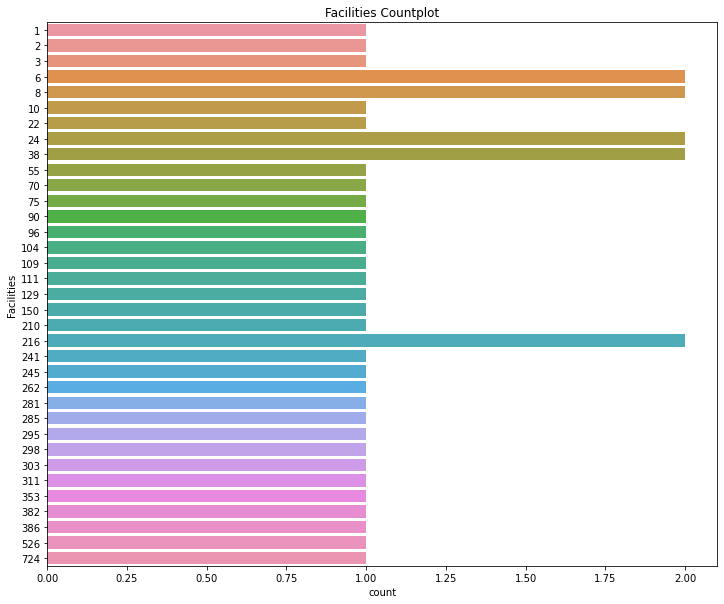

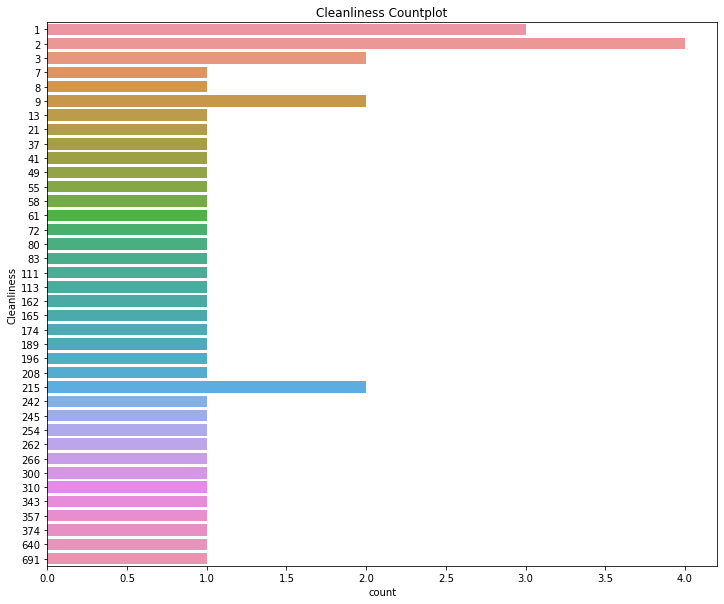

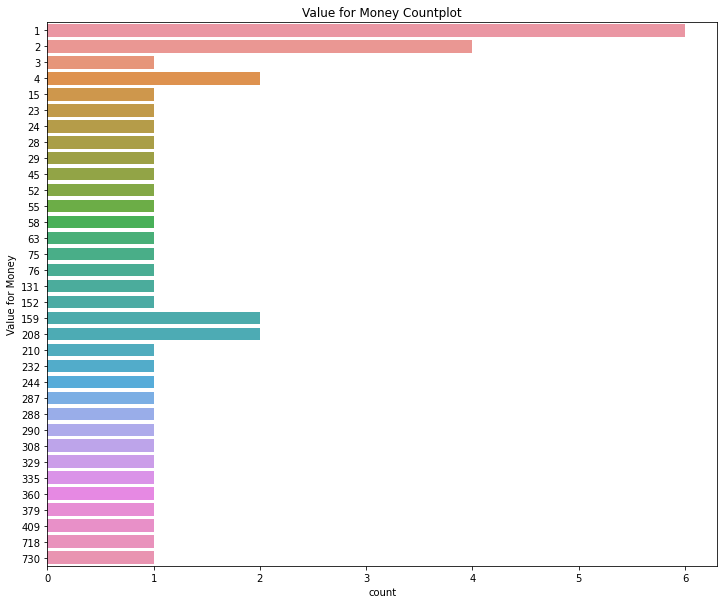

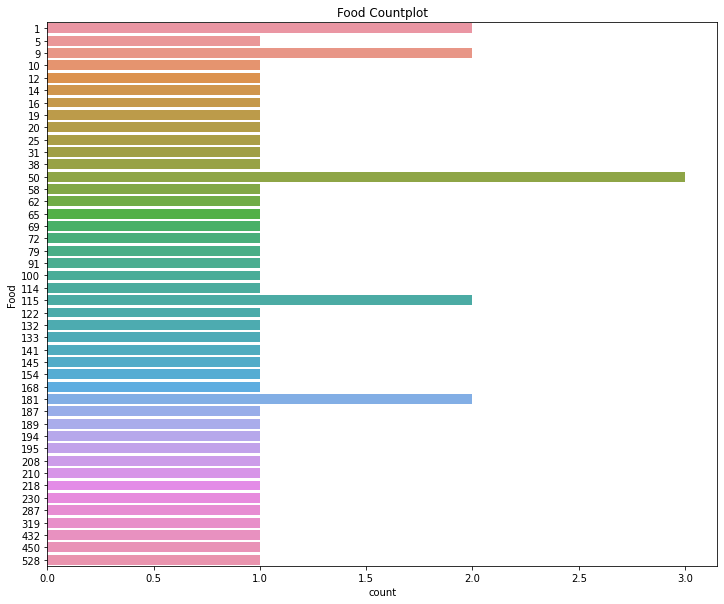

In [41]:
c=["Location","Hospitality","Facilities", "Cleanliness","Value for Money","Food"]
for i, cn in enumerate(data[c]):
    data[cn]=data[cn].astype(float)
    rate = (data[data[cn]!=0][cn].value_counts())
    fig, ax = plt.subplots(figsize=(12,10))
    sns.countplot(y=rate)
    plt.title( cn+" "+'Countplot')
    #plt.savefig('stars.png')
    plt.show()

## plot the map

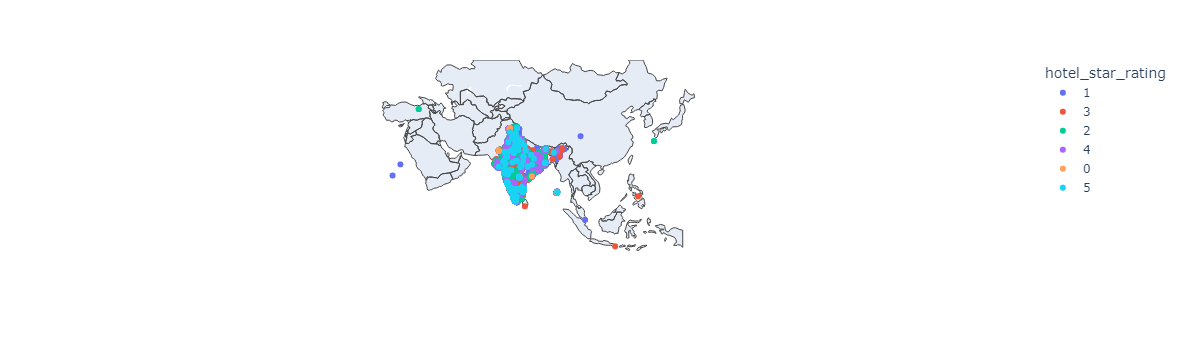

In [42]:
fig = px.scatter_geo(data, lon=data["longitude"],lat=data["latitude"], scope="asia",

                     color=data["hotel_star_rating"],hover_name="property_name"
                     )
fig.show()

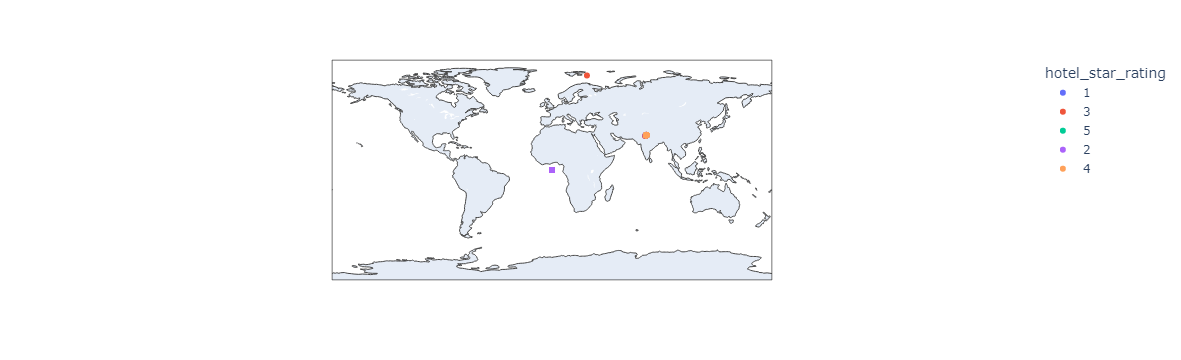

In [43]:
NewDelhiAndNCR= data[data.city == 'NewDelhiAndNCR']
fig =px.scatter_geo(NewDelhiAndNCR, lat="latitude", lon="longitude",
                   size_max=15,color=NewDelhiAndNCR["hotel_star_rating"],hover_name="property_name" )

fig.show()

Let's drop some lagging Data

In [44]:
NewDelhiAndNCR=NewDelhiAndNCR[NewDelhiAndNCR.latitude != 0]
NewDelhiAndNCR

area            city  \
5834                          Gurgaon,Sector 44, Gurgaon  NewDelhiAndNCR   
5835                                          Karol Bagh  NewDelhiAndNCR   
5836   Karol Bagh,New Delhi Railway Station,Central D...  NewDelhiAndNCR   
5837                                         Patel Nagar  NewDelhiAndNCR   
5838     Gurgaon,Sector 56, Gurgaon,Sushant Lok, Gurgaon  NewDelhiAndNCR   
...                                                  ...             ...   
18265                                     NewDelhiAndNCR  NewDelhiAndNCR   
18266                                  Sector 34 , Noida  NewDelhiAndNCR   
18267                                     NewDelhiAndNCR  NewDelhiAndNCR   
18268                       8992, DB Gupta Road, Pahar g  NewDelhiAndNCR   
18269                     Gurgaon,DLF Phase - 2, Gurgaon  NewDelhiAndNCR   

      country hotel_star_rating   latitude  longitude mmt_location_rating  \
5834    Hotel                 1  28.598351  77.231450                   5   
5835    Hotel                 1  28.643946  77.187683                 4.7   
5836    Hotel                 3  28.643195  77.174096                   5   
5837    Hotel                 3  28.643881  77.172533                 3.5   
5838    Hotel                 1  28.420140  77.100595                   4   
...       ...               ...        ...        ...                 ...   
18265   Hotel                 1  28.466140  77.099472                   0   
18266   Hotel                 2  28.585081  77.361564                   0   
18267   Hotel                 1  28.659243  77.435481                   0   
18268   Hotel                 1  28.645619  77.211792                   0   
18269   Hotel                 3  28.492481  77.020660                   0   

       mmt_review_count  mmt_review_score  \
5834                1.0               5.0   
5835                3.0               4.4   
5836                1.0               3.8   
5837                2.0               3.0   
5838                1.0               2.3   
...                 ...               ...   
18265               0.0               2.0   
18266               0.0               0.0   
18267               0.0               0.0   
18268               0.0               0.0   
18269               0.0               0.0   

                         mmt_traveller_type_review_count  ...  room_types  \
5834    Families:0|Couples:0|Business:0|Solo:1|Friends:0  ...       Hotel   
5835    Families:2|Couples:0|Business:0|Solo:0|Friends:0  ...       Hotel   
5836    Families:0|Couples:0|Business:0|Solo:0|Friends:0  ...       Hotel   
5837    Families:0|Couples:1|Business:0|Solo:0|Friends:0  ...       Hotel   
5838    Families:0|Couples:0|Business:0|Solo:0|Friends:0  ...       Hotel   
...                                                  ...  ...         ...   
18265  Families:{{ratingSummaryInfo.miscMap['family']...  ...       Hotel   
18266  Families:{{ratingSummaryInfo.miscMap['family']...  ...       Hotel   
18267  Families:{{ratingSummaryInfo.miscMap['family']...  ...       Hotel   
18268  Families:{{ratingSummaryInfo.miscMap['family']...  ...       Hotel   
18269  Families:{{ratingSummaryInfo.miscMap['family']...  ...       Hotel   

      site_review_rating                                   traveller_rating  \
5834                 0.0  Location:5/5 | Hospitality:5/5 | Facilities:5/...   
5835                 0.0  Location:4.7/5 | Hospitality:5/5 | Facilities:...   
5836                 0.0  Location:5/5 | Hospitality:4/5 | Facilities:3/...   
5837                 0.0  Location:3.5/5 | Hospitality:5/5 | Facilities:...   
5838                 0.0  Location:4/5 | Hospitality:2/5 | Facilities:2/...   
...                  ...                                                ...   
18265                0.0                                                  0   
18266                0.0                                                  0   
18267                0.0             

## Swap some column Values

In [45]:
#latitude and longitude values swapped in this row
NewDelhiAndNCR[NewDelhiAndNCR["latitude"]>70]

area            city country hotel_star_rating   latitude  longitude  \
18249  201301  NewDelhiAndNCR   Hotel                 3  77.338195  28.598033   

      mmt_location_rating  mmt_review_count  mmt_review_score  \
18249                   0               0.0               0.0   

                         mmt_traveller_type_review_count  ...  room_types  \
18249  Families:{{ratingSummaryInfo.miscMap['family']...  ...       Hotel   

      site_review_rating traveller_rating                           uniq_id  \
18249                0.0                0  e39c71ac40a8f119855e63459384ee2c   

      Location Hospitality Facilities Cleanliness Value for Money  Food  
18249      0.0         0.0        0.0         0.0             0.0   0.0  

[1 rows x 25 columns]

In [46]:
m = NewDelhiAndNCR["latitude"]>70

NewDelhiAndNCR.loc[m, ['latitude', 'longitude']] = (
    NewDelhiAndNCR.loc[m, ['longitude', 'latitude']].values)
NewDelhiAndNCR[NewDelhiAndNCR["uniq_id"]=="e39c71ac40a8f119855e63459384ee2c"]  

area            city country hotel_star_rating   latitude  longitude  \
18249  201301  NewDelhiAndNCR   Hotel                 3  28.598033  77.338195   

      mmt_location_rating  mmt_review_count  mmt_review_score  \
18249                   0               0.0               0.0   

                         mmt_traveller_type_review_count  ...  room_types  \
18249  Families:{{ratingSummaryInfo.miscMap['family']...  ...       Hotel   

      site_review_rating traveller_rating                           uniq_id  \
18249                0.0                0  e39c71ac40a8f119855e63459384ee2c   

      Location Hospitality Facilities Cleanliness Value for Money  Food  
18249      0.0         0.0        0.0         0.0             0.0   0.0  

[1 rows x 25 columns]

In [47]:
NewDelhiAndNCR[NewDelhiAndNCR["uniq_id"]=="e39c71ac40a8f119855e63459384ee2c"]

area            city country hotel_star_rating   latitude  longitude  \
18249  201301  NewDelhiAndNCR   Hotel                 3  28.598033  77.338195   

      mmt_location_rating  mmt_review_count  mmt_review_score  \
18249                   0               0.0               0.0   

                         mmt_traveller_type_review_count  ...  room_types  \
18249  Families:{{ratingSummaryInfo.miscMap['family']...  ...       Hotel   

      site_review_rating traveller_rating                           uniq_id  \
18249                0.0                0  e39c71ac40a8f119855e63459384ee2c   

      Location Hospitality Facilities Cleanliness Value for Money  Food  
18249      0.0         0.0        0.0         0.0             0.0   0.0  

[1 rows x 25 columns]

## Cleaned Data plot

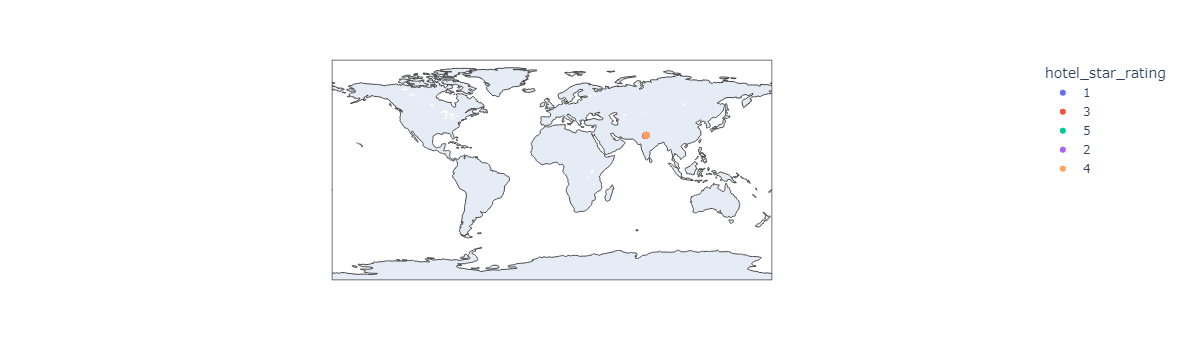

In [48]:

fig =px.scatter_geo(NewDelhiAndNCR, lat="latitude", lon="longitude",
                   size_max=15,color=NewDelhiAndNCR["hotel_star_rating"],hover_name="property_name" )

fig.show()

Let's go for Clustering


<h2 style="background-color:DodgerBlue;text-align: center">Hotels in NewDelhiAndNCR</h2>


In [49]:
import geopandas as gpd

In [50]:
gdf = gpd.GeoDataFrame(
    NewDelhiAndNCR, geometry=gpd.points_from_xy(x=NewDelhiAndNCR.longitude, y=NewDelhiAndNCR.latitude)
)
gdf

area            city  \
5834                          Gurgaon,Sector 44, Gurgaon  NewDelhiAndNCR   
5835                                          Karol Bagh  NewDelhiAndNCR   
5836   Karol Bagh,New Delhi Railway Station,Central D...  NewDelhiAndNCR   
5837                                         Patel Nagar  NewDelhiAndNCR   
5838     Gurgaon,Sector 56, Gurgaon,Sushant Lok, Gurgaon  NewDelhiAndNCR   
...                                                  ...             ...   
18265                                     NewDelhiAndNCR  NewDelhiAndNCR   
18266                                  Sector 34 , Noida  NewDelhiAndNCR   
18267                                     NewDelhiAndNCR  NewDelhiAndNCR   
18268                       8992, DB Gupta Road, Pahar g  NewDelhiAndNCR   
18269                     Gurgaon,DLF Phase - 2, Gurgaon  NewDelhiAndNCR   

      country hotel_star_rating   latitude  longitude mmt_location_rating  \
5834    Hotel                 1  28.598351  77.231450                   5   
5835    Hotel                 1  28.643946  77.187683                 4.7   
5836    Hotel                 3  28.643195  77.174096                   5   
5837    Hotel                 3  28.643881  77.172533                 3.5   
5838    Hotel                 1  28.420140  77.100595                   4   
...       ...               ...        ...        ...                 ...   
18265   Hotel                 1  28.466140  77.099472                   0   
18266   Hotel                 2  28.585081  77.361564                   0   
18267   Hotel                 1  28.659243  77.435481                   0   
18268   Hotel                 1  28.645619  77.211792                   0   
18269   Hotel                 3  28.492481  77.020660                   0   

       mmt_review_count  mmt_review_score  \
5834                1.0               5.0   
5835                3.0               4.4   
5836                1.0               3.8   
5837                2.0               3.0   
5838                1.0               2.3   
...                 ...               ...   
18265               0.0               2.0   
18266               0.0               0.0   
18267               0.0               0.0   
18268               0.0               0.0   
18269               0.0               0.0   

                         mmt_traveller_type_review_count  ...  \
5834    Families:0|Couples:0|Business:0|Solo:1|Friends:0  ...   
5835    Families:2|Couples:0|Business:0|Solo:0|Friends:0  ...   
5836    Families:0|Couples:0|Business:0|Solo:0|Friends:0  ...   
5837    Families:0|Couples:1|Business:0|Solo:0|Friends:0  ...   
5838    Families:0|Couples:0|Business:0|Solo:0|Friends:0  ...   
...                                                  ...  ...   
18265  Families:{{ratingSummaryInfo.miscMap['family']...  ...   
18266  Families:{{ratingSummaryInfo.miscMap['family']...  ...   
18267  Families:{{ratingSummaryInfo.miscMap['family']...  ...   
18268  Families:{{ratingSummaryInfo.miscMap['family']...  ...   
18269  Families:{{ratingSummaryInfo.miscMap['family']...  ...   

       site_review_rating                                   traveller_rating  \
5834                  0.0  Location:5/5 | Hospitality:5/5 | Facilities:5/...   
5835                  0.0  Location:4.7/5 | Hospitality:5/5 | Facilities:...   
5836                  0.0  Location:5/5 | Hospitality:4/5 | Facilities:3/...   
5837                  0.0  Location:3.5/5 | Hospitality:5/5 | Facilities:...   
5838                  0.0  Location:4/5 | Hospitality:2/5 | Facilities:2/...   
...                   ...                                                ...   
18265                 0.0                                                  0   
18266                 0.0                                                  0   
18267                 0.0                                                  0   
18268                 0.0                                                  0   
18269       

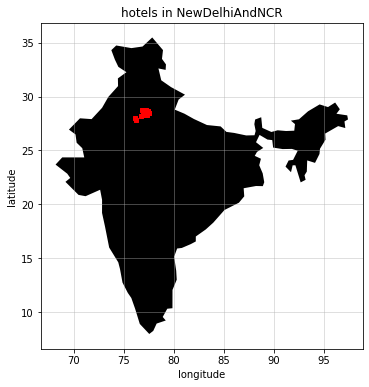

In [55]:
# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "India"].plot(color="black",ax=ax)
NewDelhiAndNCR.plot(x="longitude", y="latitude", kind="scatter", 
        c="red", marker="s", 
        title=f"hotels in NewDelhiAndNCR", 
        ax=ax)
# add grid
ax.grid(b=True, alpha=0.5)
plt.show()

<h1 style="background-color:yellow;text-align: center">4.Clustering</h1>

### K-Means Clustering

In [56]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [57]:
import geopandas as gpd

In [58]:
NewDelhiAndNCR=NewDelhiAndNCR.dropna()

In [59]:

# Elbow method to determine the number of K in Kmeans Clustering
coords = NewDelhiAndNCR[['longitude','latitude']]

distortions = []
K = range(1,25)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel = kmeansModel.fit(coords)
    distortions.append(kmeansModel.inertia_)



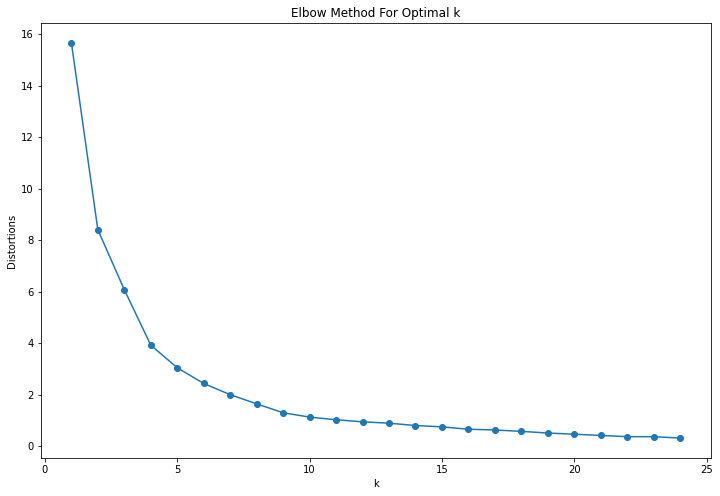

In [60]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(K, distortions, marker='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k')
plt.savefig('elbow.png')
plt.show()
     

In [61]:

from sklearn.metrics import silhouette_score

sil = []
kmax = 50

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(coords)
    labels = kmeans.labels_
    sil.append(silhouette_score(coords, labels, metric = 'euclidean'))

In [62]:

for i in [2,3,4,5,6]:
    '''
    Create KMeans instance for different number of clusters
    '''
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(coords)
    
    y = kmeans.labels_
    print(f"k ={i} slhouette_score ", silhouette_score(coords, y, metric='euclidean'))

k =2 slhouette_score  0.5219744570411767
k =3 slhouette_score  0.5204784025694758
k =4 slhouette_score  0.5389262846458213
k =5 slhouette_score  0.5284403094917101
k =6 slhouette_score  0.5442307677285694


In [63]:
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(coords)
y = kmeans.labels_
print("k = 4", " silhouette_score ", silhouette_score(coords, y, metric='euclidean'))
     

k = 4  silhouette_score  0.5284403094917101


<h1 style="background-color:yellow;text-align: center">5.Visualizing Cluster</h1>


In [64]:

NewDelhiAndNCR['cluster'] = kmeans.predict(NewDelhiAndNCR[['longitude','latitude']])
i=np.arange(0,(len(NewDelhiAndNCR["uniq_id"])))
NewDelhiAndNCR.set_index(i,inplace=True)
NewDelhiAndNCR.head()

area            city country  \
0                         Gurgaon,Sector 44, Gurgaon  NewDelhiAndNCR   Hotel   
1                                         Karol Bagh  NewDelhiAndNCR   Hotel   
2  Karol Bagh,New Delhi Railway Station,Central D...  NewDelhiAndNCR   Hotel   
3                                        Patel Nagar  NewDelhiAndNCR   Hotel   
4    Gurgaon,Sector 56, Gurgaon,Sushant Lok, Gurgaon  NewDelhiAndNCR   Hotel   

  hotel_star_rating   latitude  longitude mmt_location_rating  \
0                 1  28.598351  77.231450                   5   
1                 1  28.643946  77.187683                 4.7   
2                 3  28.643195  77.174096                   5   
3                 3  28.643881  77.172533                 3.5   
4                 1  28.420140  77.100595                   4   

   mmt_review_count  mmt_review_score  \
0               1.0               5.0   
1               3.0               4.4   
2               1.0               3.8   
3               2.0               3.0   
4               1.0               2.3   

                    mmt_traveller_type_review_count  ...  \
0  Families:0|Couples:0|Business:0|Solo:1|Friends:0  ...   
1  Families:2|Couples:0|Business:0|Solo:0|Friends:0  ...   
2  Families:0|Couples:0|Business:0|Solo:0|Friends:0  ...   
3  Families:0|Couples:1|Business:0|Solo:0|Friends:0  ...   
4  Families:0|Couples:0|Business:0|Solo:0|Friends:0  ...   

                                    traveller_rating  \
0  Location:5/5 | Hospitality:5/5 | Facilities:5/...   
1  Location:4.7/5 | Hospitality:5/5 | Facilities:...   
2  Location:5/5 | Hospitality:4/5 | Facilities:3/...   
3  Location:3.5/5 | Hospitality:5/5 | Facilities:...   
4  Location:4/5 | Hospitality:2/5 | Facilities:2/...   

                            uniq_id Location Hospitality Facilities  \
0  693358e6d8740fa7b181297b76b25b5b      5.0         5.0        5.0   
1  85d0e537f2e3bfa4b2c479eddd354f13      4.7         5.0        4.0   
2  010ac45f200a414359d95195b51913fd      5.0         4.0        3.0   
3  d05fe471ee3247c11ccb0a2d39106930      3.5         5.0        2.5   
4  62d85c189ea05145e3d04d993aef57f7      4.0         2.0        2.0   

  Cleanliness Value for Money Food                   geometry  cluster  
0         5.0             5.0  5.0  POINT (77.23145 28.59835)        0  
1         4.7             4.7  4.5  POINT (77.18768 28.64395)        0  
2         3.0             4.0  4.0  POINT (77.17410 28.64319)        0  
3         4.0             3.0  3.0  POINT (77.17253 28.64388)        0  
4         2.0             2.0  2.0  POINT (77.10059 28.42014)        3  

[5 rows x 27 columns]

In [65]:
NewDelhiAndNCR['cluster'].value_counts()

0    252
3    192
1    179
4     76
2      2
Name: cluster, dtype: int64

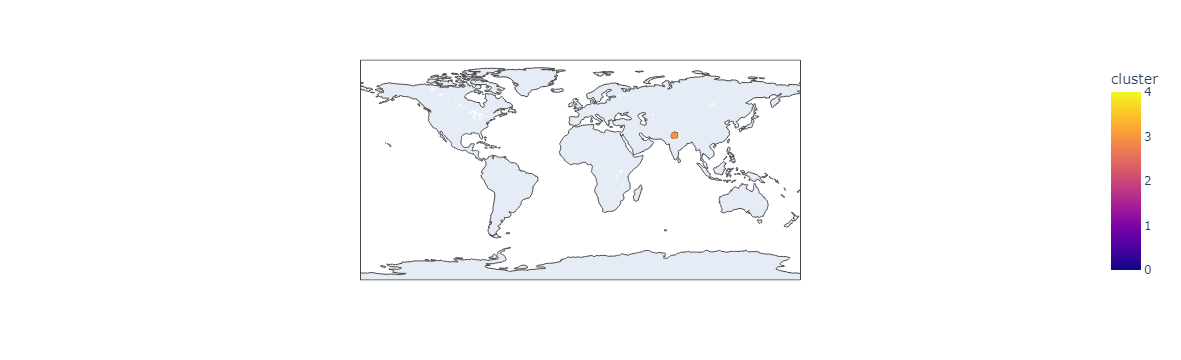

In [66]:
px.scatter_geo(NewDelhiAndNCR, lat="latitude", lon="longitude",color=NewDelhiAndNCR["cluster"])
                

In [67]:
import folium
from branca.element import Figure
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in NewDelhiAndNCR.geometry]

In [68]:
geo_df_list

[[28.598351, 77.23145],
 [28.643946, 77.187683],
 [28.643195, 77.174096],
 [28.643881, 77.172533],
 [28.42014, 77.100595],
 [28.629438, 77.12175],
 [28.663829, 77.321179],
 [28.645555, 77.192893],
 [28.52863, 77.272515],
 [28.646807, 77.187895],
 [28.641078, 77.213416],
 [28.443492, 77.034493],
 [28.489848, 77.283002],
 [28.564727, 77.196064],
 [28.6506, 77.194431],
 [28.651163, 77.234128],
 [28.480555, 77.086805],
 [28.667123, 77.093256],
 [28.557332, 77.206421],
 [28.464945, 77.064613],
 [28.629877, 77.314643],
 [28.538393, 77.151643],
 [28.462165, 77.067695],
 [28.648338, 77.208878],
 [28.449846, 77.527986],
 [28.563613, 77.265331],
 [28.486186, 77.093248],
 [28.482475, 77.086113],
 [28.643339, 77.216641],
 [28.647224, 77.188713],
 [28.467022, 77.095708],
 [28.632599, 77.222748],
 [28.646155, 77.173433],
 [28.648817, 77.193451],
 [28.474706, 77.042753],
 [28.476077, 77.480705],
 [28.556311, 77.247542],
 [28.65071, 77.186857],
 [28.480159, 77.066917],
 [28.64614, 77.192367],
 [28.623

In [69]:
fig=Figure(width=550,height=350)
m3=folium.Map(location=[28.644800, 77.216721],tiles='cartodbpositron',zoom_start=11,min_zoom=8,max_zoom=14)

In [70]:
i=0
for coordinates in geo_df_list:

    if NewDelhiAndNCR["cluster"][i] == 0:
        type_color = "green"
    elif NewDelhiAndNCR["cluster"][i] == 1:
        type_color = "blue"
    elif NewDelhiAndNCR["cluster"][i] == 2:
        type_color = "orange"
    elif NewDelhiAndNCR["cluster"][i] == 3:
        type_color = "pink"
    else:
        type_color = "purple"
    m3.add_child(
        folium.Marker(
            location=coordinates,popup=NewDelhiAndNCR["property_name"][i],icon=folium.Icon(color="%s" % type_color),))
    i = i + 1



m3




In [71]:
m3.save("Newdelhi.png")

In [72]:
NewDelhiAndNCR.columns

Index(['area', 'city', 'country', 'hotel_star_rating', 'latitude', 'longitude',
       'mmt_location_rating', 'mmt_review_count', 'mmt_review_score',
       'mmt_traveller_type_review_count', 'mmt_tripadvisor_count',
       'property_address', 'property_id', 'property_name', 'property_type',
       'room_types', 'site_review_rating', 'traveller_rating', 'uniq_id',
       'Location', 'Hospitality', 'Facilities', 'Cleanliness',
       'Value for Money', 'Food', 'geometry', 'cluster'],
      dtype='object')

## Hotel Recommendations

In [73]:
top_restaurants_Newdelhi = NewDelhiAndNCR.sort_values(by=['mmt_review_count', 'hotel_star_rating'], ascending=False)
top_restaurants_Newdelhi.head()
     

area            city  \
461                New Delhi Railway Station,Paharganj  NewDelhiAndNCR   
360                               Dwarka,Delhi Airport  NewDelhiAndNCR   
425          Ghaziabad,East Delhi,Kaushambi, Ghaziabad  NewDelhiAndNCR   
66   Mahipalpur,Kapashera,Delhi Airport,Aerocity Ho...  NewDelhiAndNCR   
83                  Mahipalpur,Kapashera,Delhi Airport  NewDelhiAndNCR   

    country hotel_star_rating   latitude  longitude mmt_location_rating  \
461   Hotel                 3  28.645659  77.216745                 3.9   
360   Hotel                 5  28.596411  77.036326                   4   
425   Hotel                 4  28.644432  77.335170                 4.1   
66    Hotel                 3  28.550826  77.129715                 4.2   
83    Hotel                 4  28.552000  77.120900                 4.6   

     mmt_review_count  mmt_review_score  \
461             417.0               3.8   
360             387.0               4.1   
425             204.0               4.1   
66              192.0               3.3   
83              130.0               4.1   

                       mmt_traveller_type_review_count  ...  \
461  Families:88|Couples:51|Business:34|Solo:27|Fri...  ...   
360  Families:105|Couples:83|Business:87|Solo:57|Fr...  ...   
425  Families:45|Couples:55|Business:33|Solo:23|Fri...  ...   
66   Families:17|Couples:13|Business:2|Solo:6|Frien...  ...   
83   Families:30|Couples:30|Business:22|Solo:12|Fri...  ...   

                                      traveller_rating  \
461  Location:3.9/5 | Hospitality:3.9/5 | Facilitie...   
360  Location:4/5 | Hospitality:4/5 | Facilities:4....   
425  Location:4.1/5 | Hospitality:4/5 | Facilities:...   
66   Location:4.2/5 | Hospitality:3.7/5 | Facilitie...   
83   Location:4.6/5 | Hospitality:4/5 | Facilities:...   

                              uniq_id Location Hospitality Facilities  \
461  5597c84e5e06c238973c2a6c152b46ae      3.9         3.9        3.8   
360  e04025deb424c1c053a78bb50fbf34b6      4.0         4.0        4.1   
425  b4ccd0d6fc6700e96cfe273169dbf0f5      4.1         4.0        4.2   
66   c55f96426e6f6f7f8faba6d9e4ed2345      4.2         3.7        3.1   
83   b7a4f9f4bba725ead987a8b44f811bbe      4.6         4.0        4.1   

    Cleanliness Value for Money Food                   geometry  cluster  
461         3.9             3.8  3.7  POINT (77.21675 28.64566)        0  
360         4.3             4.0  3.9  POINT (77.03633 28.59641)        3  
425         4.3             4.1  3.6  POINT (77.33517 28.64443)        4  
66          3.1             3.2  3.4  POINT (77.12972 28.55083)        1  
83          4.3             4.0  3.8  POINT (77.12090 28.55200)        1  

[5 rows x 27 columns]


<h1 style="background-color:yellow;text-align: center">6. User Recommentations</h1>

In [74]:
def recommend_restaurants(df, longitude, latitude):
    # Predict the cluster for longitude and latitude provided
    cluster = kmeans.predict(np.array([longitude,latitude]).reshape(1,-1))[0]
    print(cluster)
   
    # Get the best restaurant in this cluster
    return  df[df['cluster']==cluster].iloc[0:5][['property_name', 'latitude','longitude']]
   
     

In [75]:
#checking function
recommend_restaurants(top_restaurants_Newdelhi,77.1200,28.55200  )

1


property_name   latitude  longitude
66                        Hotel Lohmod  28.550826  77.129715
83   Lemon Tree Premier, Delhi Airport  28.552000  77.120900
415       Red Fox Hotel, Delhi Airport  28.551823  77.120804
345                         Hotel Star  28.549914  77.128748
25                       Tavisha Hotel  28.563613  77.265331

### Getting data from user

In [76]:
latitude=float(input ("Enter latitude: "))
longitude=float(input ("Enter longitude: "))
Hotel=recommend_restaurants(top_restaurants_Newdelhi,longitude, latitude  )
i=np.arange(0,5)
Hotel.set_index(i,inplace=True)

Hotel

Enter latitude:  28.768
Enter longitude:  77.3456


4


property_name   latitude  longitude
0  Mahagun Sarovar Portico Suites  28.644432  77.335170
1      Radisson Blu Greater Noida  28.449846  77.527986
2       Red Fox Hotel, East Delhi  28.606902  77.332996
3          The Golden Palms Hotel  28.629030  77.315147
4                   Nirulas Hotel  28.582995  77.313568

In [83]:
Hotel_data=Hotel.copy()


In [84]:
Hotel_data=Hotel_data.drop(["property_name"],axis=1)
Hotel_data

latitude  longitude
0  28.644432  77.335170
1  28.449846  77.527986
2  28.606902  77.332996
3  28.629030  77.315147
4  28.582995  77.313568

In [85]:
dataList = [] #empty list
for index, row in Hotel_data.iterrows(): 
    mylist = [row.latitude, row.longitude]
    dataList.append(mylist)

In [86]:
dataList

[[28.644432, 77.33517],
 [28.449846, 77.527986],
 [28.606902, 77.332996],
 [28.6290295, 77.315147],
 [28.582995, 77.313568]]

### Plotting the Data

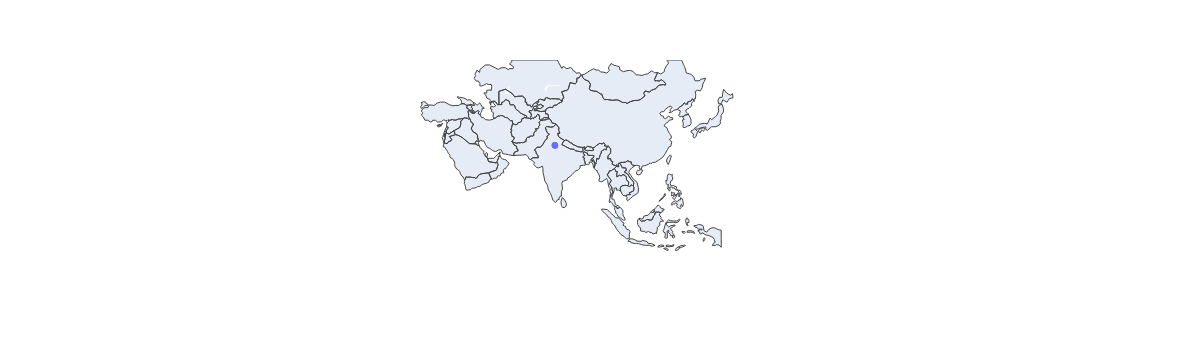

In [87]:
px.scatter_geo(Hotel, lat="latitude", lon="longitude",hover_name=Hotel["property_name"],scope="asia")

In [88]:
m1=folium.Map(location=[28.644800, 77.216721],tiles='cartodbpositron',zoom_start=11,min_zoom=8,max_zoom=14)
i=0
for coordinates in dataList:
  
    m1.add_child(
        folium.Marker(
            location=dataList[i],popup=Hotel["property_name"][i],icon=folium.Icon(color="Pink")))
    i = i + 1



m1

END!!!